In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
import regex as re
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx 
from collections import Counter
from Functions import DataCollection, DataCleaning, GetConnectedMoviesArtist

In [3]:
params = {
        "thriller": {"years": ["2020s","2010s", "2000s"],
                "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],[[]]]}, 
        "action": {"years": ["2020s","2010s", "2000s"],
                "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],["2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"]]},             
        "comedy": {"years": ["2020s","2010s", "2000s"],
                "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],["2000", "2001", "2002","2003","2004","2005","2006","2007"]]},
        "adventure": {"years": ["2020s","2010s", "2000s"],
                "sub_years": [["2020", "2021", "2022", "2023"], ["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"], ["2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"]]}, 
        "horror": {"years": ["2020", "2021", "2022", "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019", "2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"], 
                "sub_years": [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]},
        "fantasy": {"years": ["2020s","2010s", "2000s"],
                "sub_years": [[[]],[[]],[[]]]}, 
        "science_fiction": {"years": ["2020s", "2010s", "2000s"],
                "sub_years": [[[]],[[]],[[]]]}, 
        }

data_collection = DataCollection()
data_movie_artist = pd.DataFrame()
for genre in params.keys():
    for years, sub_years in zip(params[genre]["years"],params[genre]["sub_years"]):
        data = data_collection.collect_movies_artist_data(genre, years, sub_years)
        data_movie_artist = pd.concat([data_movie_artist, data]) 

data_movie_artist = data_movie_artist.reset_index(drop=True)

In [4]:
data_movie_artist.shape

(7456, 7)

In [5]:
data_movie_artist.to_json('data_movie_artist.json', orient='table', indent=1)

In [6]:
data_movie_artist = pd.read_json('data_movie_artist.json', orient='table')
data_movie_artist.shape

(7456, 7)

In [7]:
data_movie_artist.dtypes

Title       object
Director    object
Cast        object
Country     object
Genre       object
Year        object
Hyperref    object
dtype: object

In [8]:
data_cleaner = DataCleaning(data_movie_artist)
data_cleaner.data_cleaning()
df_movies = data_cleaner.data

In [9]:
df_movies.shape

(5780, 7)

In [10]:
df_movies[df_movies.duplicated(subset='Title')]

,Title,Director,Cast,Country,Genre,Year,Hyperref


In [11]:
df_movies.to_json('df_movies.json', orient='table', indent=1)

In [12]:
df_movies

,Title,Director,Cast,Country,Genre,Year,Hyperref
0,365 Days,barbara biaowas tomasz mandes,"anna-maria sieklucka,michele morrone, bronisaw...",europe,Thriller,2020,365_Days_(2020_film)
1,7500,patrick vollrath,"joseph gordon-levitt,aylin tezel",mix,Action,2020,7500_(film)
2,Archenemy,adam egypt mortimer,"joe manganiello,skylan brooks, zolee griggs,pa...",mix,Action,2020,Archenemy_(film)
3,Asuraguru,araajdheep,"vikram prabhu,mahima nambiar,subbaraju,yogi babu",india,Action,2020,Asuraguru
4,Aswathama,ramana teja,"naga shourya,mehreen pirzada",india,Action,2020,Aswathama_(film)
...,...,...,...,...,...,...,...
6196,The League of Extraordinary Gentlemen,stephen norrington,"sean connery,shane west,stuart townsend",united states,Mix,2003,The_League_of_Extraordinary_Gentlemen_(film)
6197,The Promise,chen kaige,"hiroyuki sanada,jang dong-gun,cecilia cheung",china,Mix,2005,The_Promise_(2005_film)
6198,Legend of the Guardians: The Owls of Ga'Hoole,zack snyder,"jim sturgess,joel edgerton,geoffrey rush,hugo ...",mix,Fantasy,2010,Legend_of_the_Guardians:_The_Owls_of_Ga%27Hoole
6199,Lethal,dustin rikert,"heather marie marsden,lorenzo lamas,frank zaga...",united states,Action,2004,Lethal_(film)


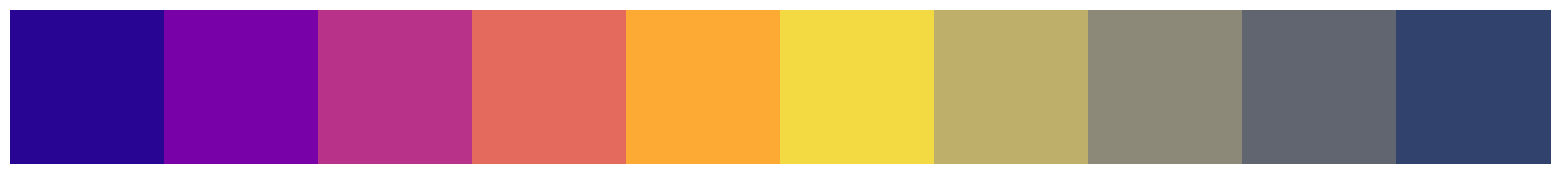

In [125]:
color_palette_cividis = sns.color_palette("cividis", 20)
color_palette_plasma = sns.color_palette("plasma", 20)
color_palette_cividis_reversed = list(reversed(color_palette_cividis))
color_palette = color_palette_plasma + color_palette_cividis_reversed
plt.figure(figsize = (20,2))
plt.imshow([color_palette[0::4]])
plt.axis('off')
plt.show()


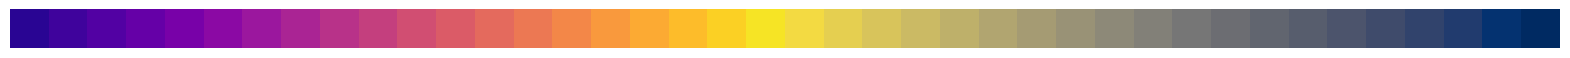

In [121]:
plt.figure(figsize = (20,2))
plt.imshow([color_palette])
plt.axis('off')
plt.show()


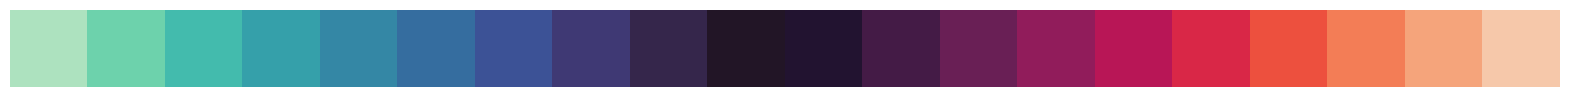

In [ ]:
color_palette_cividis = sns.color_palette("mako", 10)
color_palette_plasma = sns.color_palette("rocket", 10)
color_palette_cividis_reversed = list(reversed(color_palette_cividis))
color_palette = color_palette_cividis_reversed + color_palette_plasma
plt.figure(figsize = (20,2))
plt.imshow([color_palette])
plt.axis('off')
plt.show()

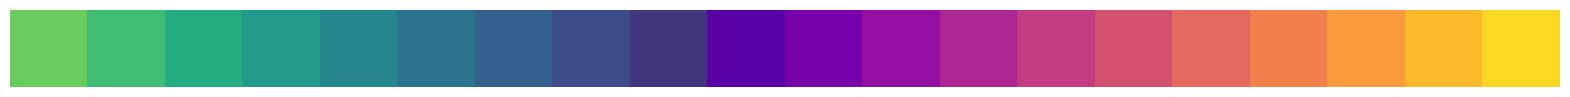

In [145]:
color_palette_cividis = sns.color_palette("viridis", 12)[1:-2]
color_palette_plasma = sns.color_palette("plasma", 12)[1:]
color_palette_cividis_reversed = list(reversed(color_palette_cividis))
color_palette = color_palette_cividis_reversed + color_palette_plasma
plt.figure(figsize = (20,2))
plt.imshow([color_palette])
plt.axis('off')
plt.show()

In [115]:
color_palette_cividis_reversed[:-1]

[(0.68051833, 0.88963189, 0.75150483),
 (0.4285828, 0.82635051, 0.6780564),
 (0.26604085, 0.73564353, 0.67914062),
 (0.20968223, 0.63088252, 0.6701105),
 (0.20418396, 0.53013715, 0.64946117),
 (0.21112526, 0.42903064, 0.6266318),
 (0.23807973, 0.32226344, 0.58941872),
 (0.25007383, 0.22365053, 0.45519562),
 (0.20976258, 0.14925954, 0.29687795)]

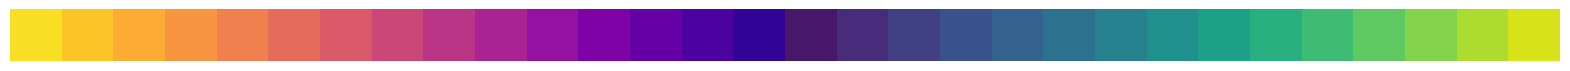

In [ ]:
color_palette_plasma = sns.color_palette("plasma", 15)
color_palette_viridis = sns.color_palette("viridis", 15) # winter
color_palette_plasma_reversed = list(reversed(color_palette_plasma))
color_palette3 = color_palette_plasma_reversed + color_palette_viridis
plt.figure(figsize = (20,2))
plt.imshow([color_palette3])
plt.axis('off')
plt.show()